# Visualisasi Senyawa-Protein

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#load df_merge
df = pd.read_csv('dataset/df_final.csv')
df_vis = pd.read_csv('dataset/final/kelas_data.csv')

In [3]:
PubChem_CID = df['PubChem CID']

In [7]:
df_vis['CID_senyawa'] = PubChem_CID
first_column = df_vis.pop('CID_senyawa')
df_vis.insert(0, 'CID_senyawa', first_column)
df_vis

,CID_senyawa,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
0,261,1,0,0,0,0,1,0
1,263,1,0,0,0,0,0,0
2,305,1,0,0,0,0,0,0
3,525,1,0,0,0,0,0,0
4,586,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5645,17760032,0,0,0,0,0,0,1
5646,1367211,0,0,0,0,0,0,1
5647,2133789,0,0,0,0,0,0,1
5648,992586,0,0,0,0,0,0,1


In [8]:
categories = list(df_vis.columns.values)
categories = categories[1:]
print(categories)

['PPARGC1A', 'INS', 'LEP', 'B3GNTL1', 'PPARG', 'EP300', 'LPL']


In [9]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df_vis[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'CID_senyawa'])
df_stats

,category,CID_senyawa
0,PPARGC1A,186
1,INS,244
2,LEP,121
3,B3GNTL1,20
4,PPARG,4942
5,EP300,428
6,LPL,151


In [10]:
df_stats['CID_senyawa'].sum()

6092

In [11]:
categories

['PPARGC1A', 'INS', 'LEP', 'B3GNTL1', 'PPARG', 'EP300', 'LPL']

In [12]:
df_vis.iloc[:,1:].sum().values

array([ 186,  244,  121,   20, 4942,  428,  151])

/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


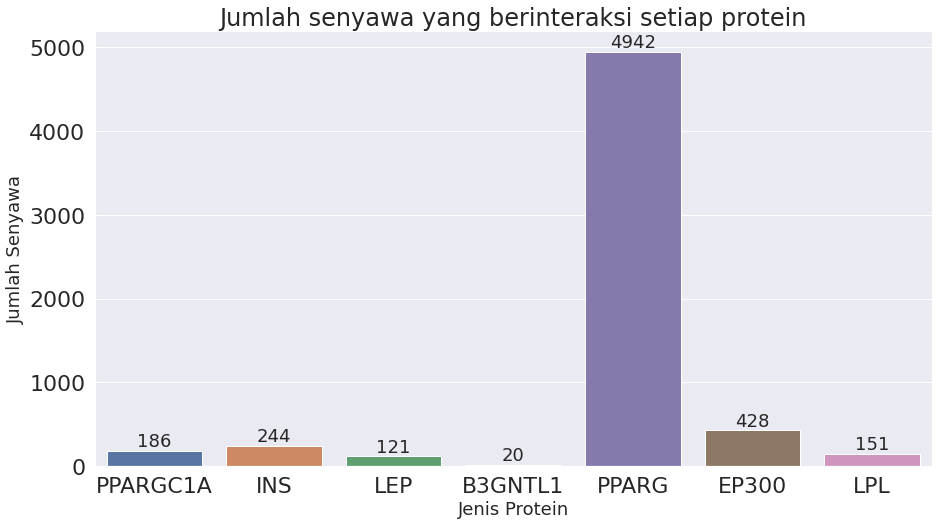

In [13]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df_vis.iloc[:,1:].sum().values)

plt.title("Jumlah senyawa yang berinteraksi setiap protein", fontsize=24)
plt.ylabel('Jumlah Senyawa', fontsize=18)
plt.xlabel('Jenis Protein', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df_vis.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

# Visualisasi Senyawa Banyak Protein

In [14]:
values = multiLabel_counts   
idx = categories
clrs = ['grey' if (x < max(values)) else 'pink' for x in values ]
# sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

NameError: name 'multiLabel_counts' is not defined

/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


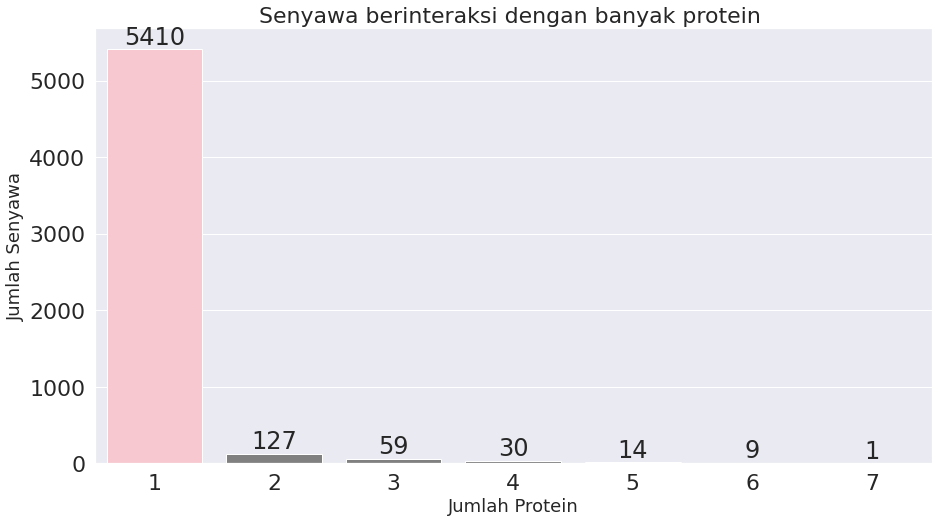

In [24]:
rowSums = df_vis.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

values = multiLabel_counts   
idx = categories
clrs = ['grey' if (x < max(values)) else 'pink' for x in values ]
# sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, palette=clrs)

plt.title("Senyawa berinteraksi dengan banyak protein ", fontsize=22)
plt.ylabel('Jumlah Senyawa', fontsize=18)
plt.xlabel('Jumlah Protein', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Visualisasi Metric

In [ ]:
lst = [['sae-dnn', 0.88408, 0.90447, 0.91494, 0.90390], ['dnn', 0.88376, 0.90395, 0.91454, 0.90254]]

In [16]:
sae_dnn = {
    'acc' : 0.88408,
    'f1': 0.90447,
    'prec': 0.91494,
    'rec': 0.90390
}

dnn = {
    'acc' : 0.88376,
    'f1': 0.90395,
    'prec': 0.91454,
    'rec': 0.90254
}

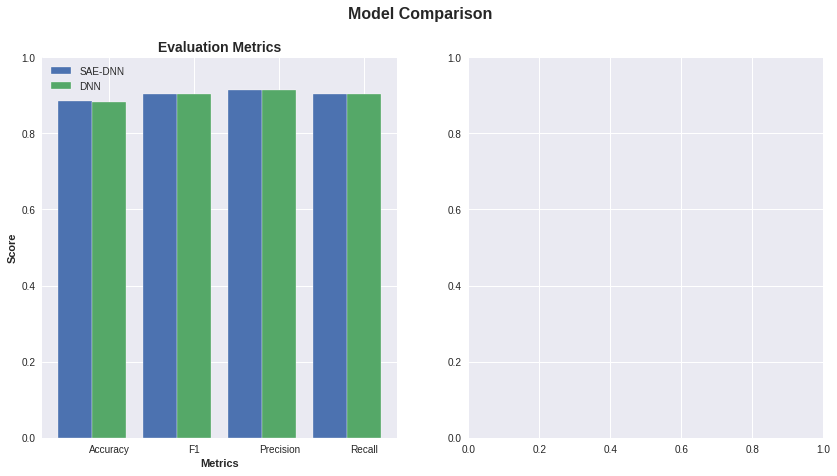

In [115]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## set bar size
barWidth = 0.4
sae_dnn_score = [sae_dnn['acc'], sae_dnn['f1'], sae_dnn['prec'], sae_dnn['rec']]
dnn_score = [dnn['acc'], dnn['f1'], dnn['prec'], dnn['rec']]

## Make the plotRandom Forest
ax1.bar(r1, sae_dnn_score, width=barWidth, edgecolor='white', label='SAE-DNN')
ax1.bar(r2, dnn_score, width=barWidth, edgecolor='white', label='DNN')

## Set position of bar on X axis
r1 = np.arange(len(sae_dnn_score))
r2 = [x + barWidth for x in r1]

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'F1', 'Precision', 'Recall']
ax1.set_xticks([r + (barWidth * 1) for r in range(len(sae_dnn_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()